<a href="https://colab.research.google.com/github/satyamgupta56/oil-and-gas-PE/blob/main/IPR_for_a_gas_well.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = {'Pwf' : [1952,1700,1500,1300] ,
       'Qg(Mscf/d)' : [0, 2624.6, 4154.7 , 5425.1]}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,Pwf,Qg(Mscf/d)
0,1952,0.0
1,1700,2624.6
2,1500,4154.7
3,1300,5425.1


In [ ]:
df['Pwf2'] = df['Pwf']**2

In [ ]:
pr = 1952

df['Pr2 - Pwf2'] = pr**2 - df['Pwf']**2

In [ ]:
df

,Pwf,Qg(Mscf/d),Pwf2,Pr2 - Pwf2
0,1952,0.0,3810304,0
1,1700,2624.6,2890000,920304
2,1500,4154.7,2250000,1560304
3,1300,5425.1,1690000,2120304


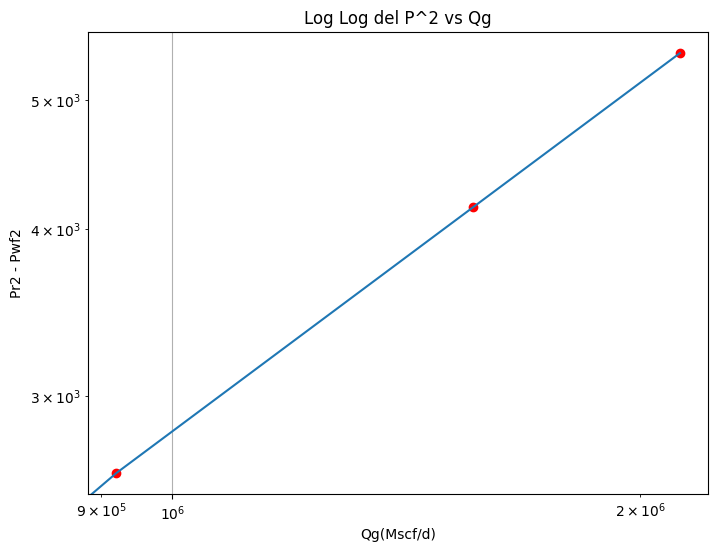

In [ ]:
#Now plot (Pr2 - Pwf2) vs Qg on a Log Log scale

plt.figure(figsize=(8,6))
plt.loglog(df['Pr2 - Pwf2'] , df['Qg(Mscf/d)'])

plt.scatter(df['Pr2 - Pwf2'] , df['Qg(Mscf/d)'] , color='r')

plt.xlabel('Qg(Mscf/d)')
plt.ylabel('Pr2 - Pwf2')

plt.title('Log Log del P^2 vs Qg')

plt.grid()

>### $ Q_g = C(P_r^{2} - P_{wf}^{2})^{n}$

> ### $ log(Qg) = log(C) + n*log(P_r^{2} - P_{wf}^{2}) $


In [ ]:
x = np.log(df['Pr2 - Pwf2'][1:])

y = np.log(df['Qg(Mscf/d)'][1:])

In [ ]:
eqn = np.polyfit(x,y, deg=1)

In [ ]:
eqn

array([ 0.86999855, -4.07453279])

In [ ]:
#Analyzing the Results -

n = eqn[0]

C = np.exp(eqn[1])

In [ ]:
C

0.01700015549474949

## So we have successfully calculated the C & n.

### $ Q_g = 0.017*(P_r^{2} - P_{wf}^{2})^{0.87} $

In [ ]:
pwf = np.linspace(0,pr,25)

qg = C*((pr**2 - pwf**2)**n)

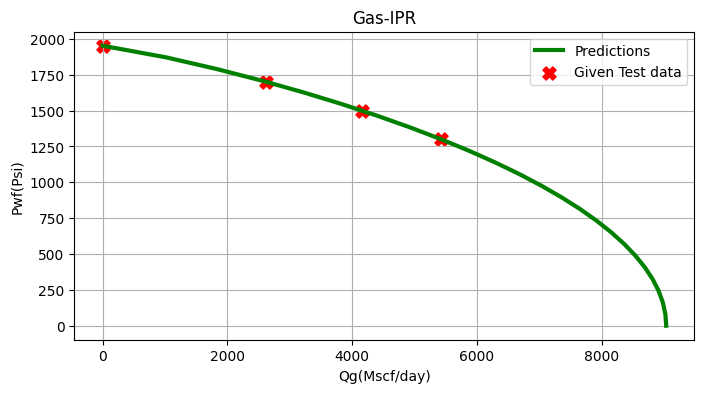

In [ ]:
plt.style.use('default')
plt.figure(figsize=(8,4))

plt.plot(qg,pwf, color='green',lw=3, label='Predictions')

plt.scatter(df['Qg(Mscf/d)'], df['Pwf'], color='r', marker='X' , s=90, label='Given Test data')

plt.legend()
plt.xlabel('Qg(Mscf/day)')
plt.ylabel('Pwf(Psi)')

plt.title('Gas-IPR')

plt.grid()